In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns
import pandas as pd

from scipy import stats
# logistic (or inverse-logit) is the inverse of the logit function
from scipy.special import expit as logistic

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from causalgraphicalmodels import CausalGraphicalModel
import daft

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


This is based on the [homework of week 8](https://github.com/rmcelreath/statrethinking_winter2019/blob/master/homework/week08.pdf) of Statistical Rethinking book material.
I do the homework based on the questions but not following a specific order.
<br>
<br>
The dataset can be found [here](https://github.com/rmcelreath/rethinking/blob/Experimental/data/)
<br>

In [28]:
df = pd.read_csv('../data/reedfrogs.csv', sep=';')

# transforming pred and size into categorical variables
# pred_id: 0 (no); 1 (pred)
# size_id: 0 (small); 1 (big)
df['pred_id'] = (df['pred'] == 'pred').astype(int)
df['size_id'] = (df['size'] == 'big').astype(int)


df['pond'] = df.index
df

,density,pred,size,surv,propsurv,pred_id,size_id,pond
0,10,no,big,9,0.900000,0,1,0
1,10,no,big,10,1.000000,0,1,1
2,10,no,big,7,0.700000,0,1,2
3,10,no,big,10,1.000000,0,1,3
4,10,no,small,9,0.900000,0,0,4
5,10,no,small,9,0.900000,0,0,5
6,10,no,small,10,1.000000,0,0,6
7,10,no,small,9,0.900000,0,0,7
8,10,pred,big,4,0.400000,1,1,8
9,10,pred,big,9,0.900000,1,1,9


## Model with ponds predictors

In [63]:
with pm.Model() as m1:
    # prior for average pond
    a_bar = pm.Normal('a_bar', 0, 1.5)
    
    # prior for std of ponds
    sigma = pm.Exponential('sigma', 1)
    
    # adaptive prior
    a_pond = pm.Normal('a_pond', a_bar, sigma, shape=len(df.pond))
    
    # log-odds for each pond
    p = pm.math.invlogit(a_pond[df.pond])
    
    # likelihood
    Si = pm.Binomial('Si', n=df.density, p=p, observed=df.surv)
    
    # posterior
    m1_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_pond, sigma, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


/home/elisio/anaconda3/lib/python3.8/site-packages/arviz/plots/traceplot.py:191: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (50), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'a_bar'}>,
        <AxesSubplot:title={'center':'a_bar'}>],
       [<AxesSubplot:title={'center':'a_pond\n0'}>,
        <AxesSubplot:title={'center':'a_pond\n0'}>],
       [<AxesSubplot:title={'center':'a_pond\n1'}>,
        <AxesSubplot:title={'center':'a_pond\n1'}>],
       [<AxesSubplot:title={'center':'a_pond\n2'}>,
        <AxesSubplot:title={'center':'a_pond\n2'}>],
       [<AxesSubplot:title={'center':'a_pond\n3'}>,
        <AxesSubplot:title={'center':'a_pond\n3'}>],
       [<AxesSubplot:title={'center':'a_pond\n4'}>,
        <AxesSubplot:title={'center':'a_pond\n4'}>],
       [<AxesSubplot:title={'center':'a_pond\n5'}>,
        <AxesSubplot:title={'center':'a_pond\n5'}>],
       [<AxesSubplot:title={'center':'a_pond\n6'}>,
        <AxesSubplot:title={'center':'a_pond\n6'}>],
       [<AxesSubplot:title={'center':'a_pond\n7'}>,
        <AxesSubplot:title={'center':'a_pond\n7'}>],
       [<AxesSubplot:title={'center':'a_pond\n8'}>,
        <Ax

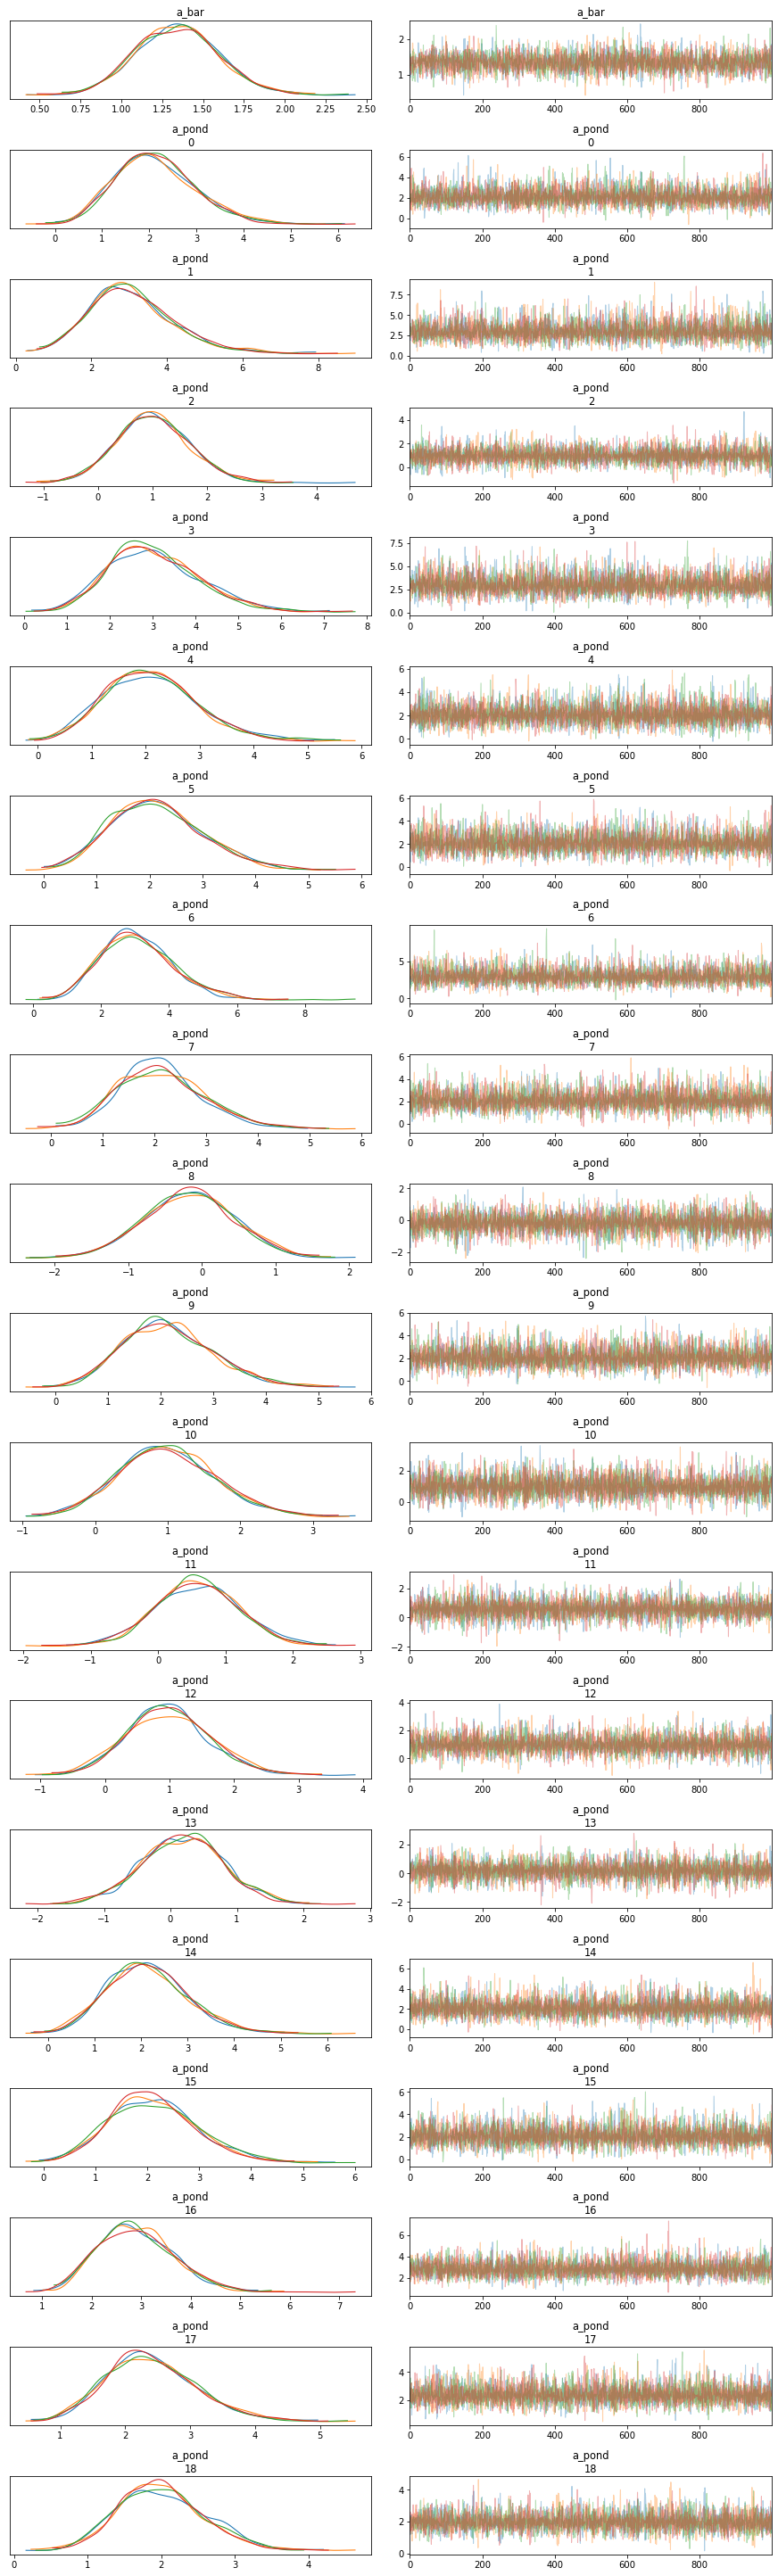

In [41]:
az.plot_trace(m1_trace)

In [42]:
az.summary(m1_trace, kind='stats', round_to=2)

,mean,sd,hdi_3%,hdi_97%
a_bar,1.34,0.25,0.85,1.80
a_pond[0],2.14,0.86,0.67,3.81
a_pond[1],3.06,1.14,0.98,5.14
a_pond[2],1.01,0.67,-0.24,2.26
a_pond[3],3.03,1.07,1.14,5.05
a_pond[4],2.11,0.87,0.45,3.65
a_pond[5],2.15,0.88,0.59,3.84
a_pond[6],3.07,1.08,1.20,5.16
a_pond[7],2.13,0.85,0.64,3.76
a_pond[8],-0.17,0.62,-1.32,1.00


## Model with ponds + predation predictors

In [54]:
with pm.Model() as m2:
    a_bar = pm.Normal('a_bar', 0, 1.5)
    sigma_a = pm.Exponential('sigma_a', 1)
    a_pond = pm.Normal('a_pond', a_bar, sigma_a, shape=len(df.pond))
    
    sigma_b = pm.Exponential('sigma_b', 1)
    b_pred = pm.Normal('b_pred', 0, sigma_b, shape=len(df.pred_id.unique()))
    
    p = pm.math.invlogit(a_pond[df.pond] + b_pred[df.pred_id])
    
    Si = pm.Binomial('Si', n=df.density, p=p, observed=df.surv)
    
    m2_trace = pm.sample(tune=4000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b_pred, sigma_b, a_pond, sigma_a, a_bar]


Sampling 4 chains for 4_000 tune and 1_000 draw iterations (16_000 + 4_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.8952139510998472, but should be close to 0.8. Try to increase the number of tuning steps.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7170292829296773, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


/home/elisio/anaconda3/lib/python3.8/site-packages/arviz/plots/traceplot.py:191: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (53), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'a_bar'}>,
        <AxesSubplot:title={'center':'a_bar'}>],
       [<AxesSubplot:title={'center':'a_pond\n0'}>,
        <AxesSubplot:title={'center':'a_pond\n0'}>],
       [<AxesSubplot:title={'center':'a_pond\n1'}>,
        <AxesSubplot:title={'center':'a_pond\n1'}>],
       [<AxesSubplot:title={'center':'a_pond\n2'}>,
        <AxesSubplot:title={'center':'a_pond\n2'}>],
       [<AxesSubplot:title={'center':'a_pond\n3'}>,
        <AxesSubplot:title={'center':'a_pond\n3'}>],
       [<AxesSubplot:title={'center':'a_pond\n4'}>,
        <AxesSubplot:title={'center':'a_pond\n4'}>],
       [<AxesSubplot:title={'center':'a_pond\n5'}>,
        <AxesSubplot:title={'center':'a_pond\n5'}>],
       [<AxesSubplot:title={'center':'a_pond\n6'}>,
        <AxesSubplot:title={'center':'a_pond\n6'}>],
       [<AxesSubplot:title={'center':'a_pond\n7'}>,
        <AxesSubplot:title={'center':'a_pond\n7'}>],
       [<AxesSubplot:title={'center':'a_pond\n8'}>,
        <Ax

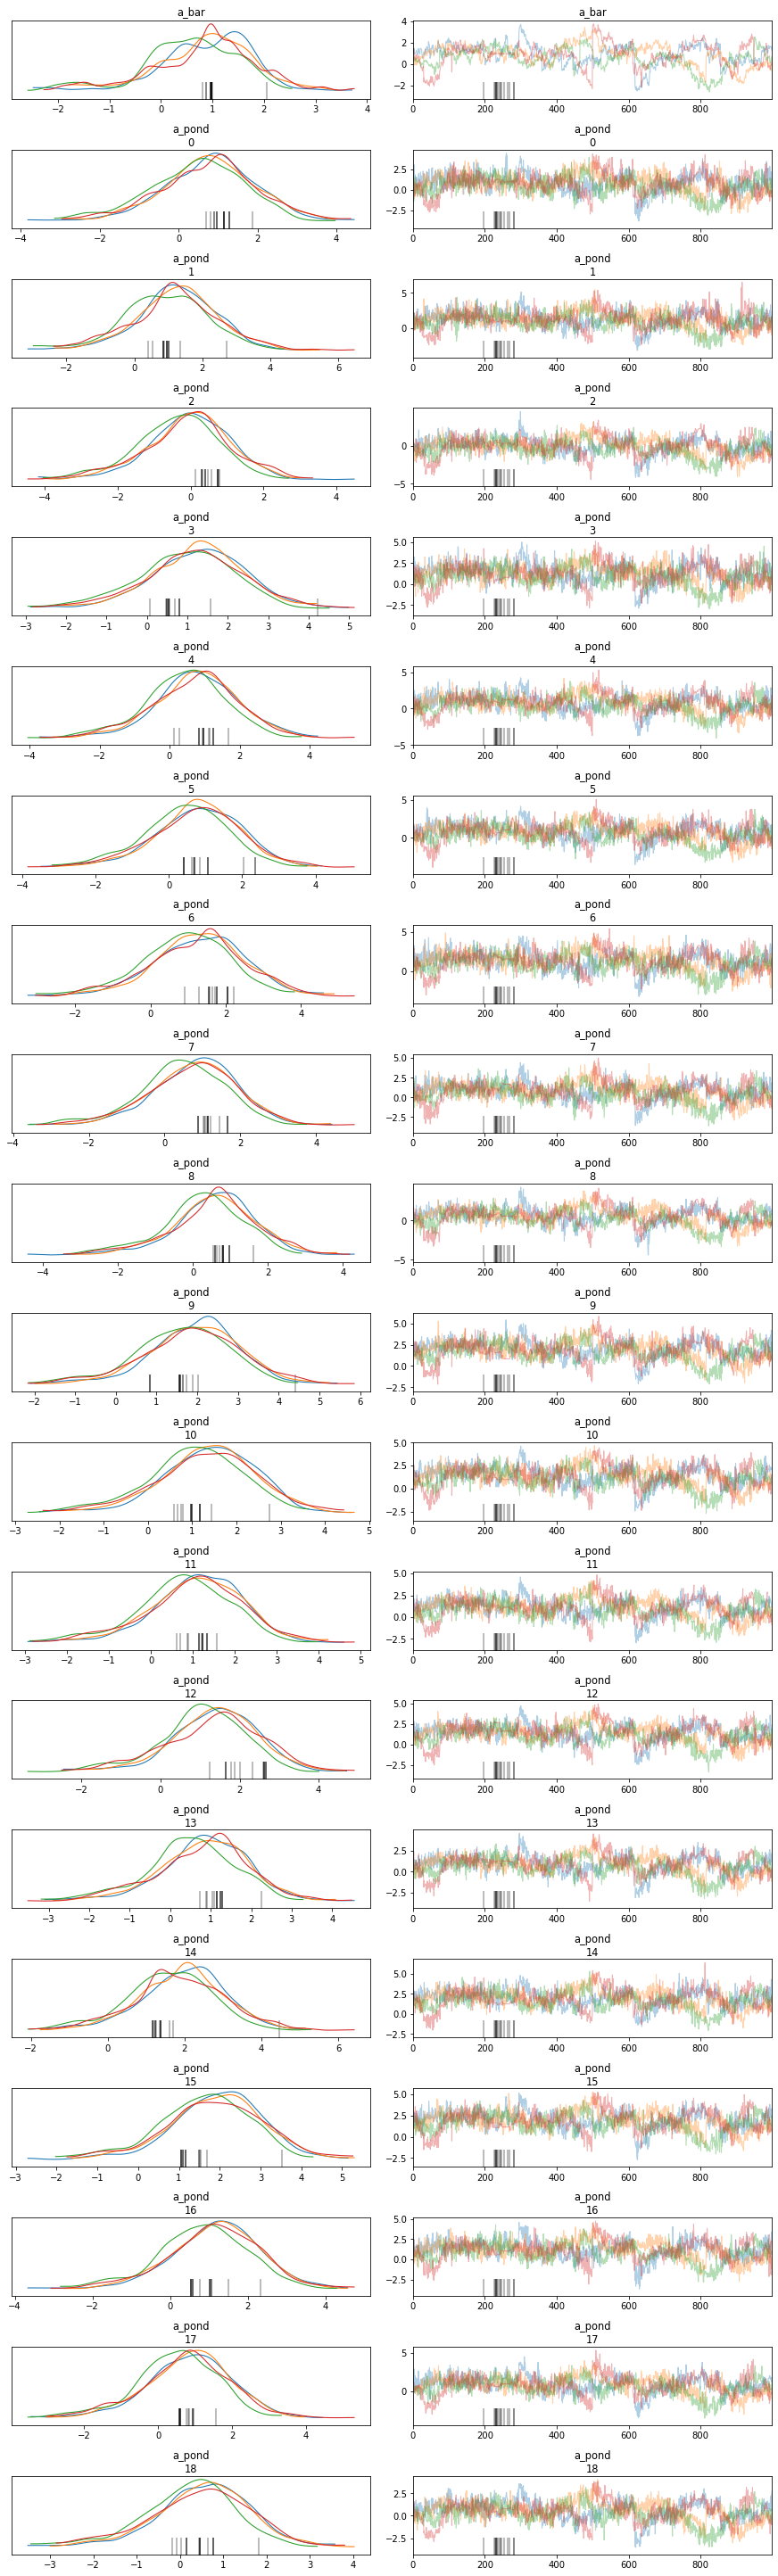

In [55]:
az.plot_trace(m2_trace)

In [50]:
az.summary(m2_trace, kind='stats', round_to=2)

,mean,sd,hdi_3%,hdi_97%
a_bar,1.01,0.86,-0.46,2.70
a_pond[0],0.91,1.10,-1.22,2.90
a_pond[1],1.41,1.09,-0.70,3.45
a_pond[2],0.12,1.07,-1.90,2.12
a_pond[3],1.41,1.11,-0.56,3.59
a_pond[4],0.91,1.08,-1.08,3.03
a_pond[5],0.91,1.09,-0.96,3.19
a_pond[6],1.41,1.13,-0.67,3.53
a_pond[7],0.88,1.10,-1.20,2.91
a_pond[8],0.72,1.00,-1.07,2.68


## Model with ponds + size predictors

In [61]:
with pm.Model() as m3:
    a_bar = pm.Normal('a_bar', 0, 1.5)
    sigma_a = pm.Exponential('sigma_a', 1)
    sigma_c = pm.Exponential('sigma_c', 1)
    
    a_pond = pm.Normal('a_pond', a_bar, sigma_a, shape=len(df.pond))
    c_size = pm.Normal('c_size', 0, sigma_c, shape=len(df.size_id.unique()))
    
    p = pm.math.invlogit(a_pond[df.pond] + c_size[df.size_id])
    
    Si = pm.Binomial('Si', n=df.density, p=p, observed=df.surv)
    
    m3_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [c_size, a_pond, sigma_c, sigma_a, a_bar]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
There were 81 divergences after tuning. Increase `target_accept` or reparameterize.
There were 56 divergences after tuning. Increase `target_accept` or reparameterize.
There were 79 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


/home/elisio/anaconda3/lib/python3.8/site-packages/arviz/plots/traceplot.py:191: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (53), generating only 20 plots
  warnings.warn(


array([[<AxesSubplot:title={'center':'a_bar'}>,
        <AxesSubplot:title={'center':'a_bar'}>],
       [<AxesSubplot:title={'center':'a_pond\n0'}>,
        <AxesSubplot:title={'center':'a_pond\n0'}>],
       [<AxesSubplot:title={'center':'a_pond\n1'}>,
        <AxesSubplot:title={'center':'a_pond\n1'}>],
       [<AxesSubplot:title={'center':'a_pond\n2'}>,
        <AxesSubplot:title={'center':'a_pond\n2'}>],
       [<AxesSubplot:title={'center':'a_pond\n3'}>,
        <AxesSubplot:title={'center':'a_pond\n3'}>],
       [<AxesSubplot:title={'center':'a_pond\n4'}>,
        <AxesSubplot:title={'center':'a_pond\n4'}>],
       [<AxesSubplot:title={'center':'a_pond\n5'}>,
        <AxesSubplot:title={'center':'a_pond\n5'}>],
       [<AxesSubplot:title={'center':'a_pond\n6'}>,
        <AxesSubplot:title={'center':'a_pond\n6'}>],
       [<AxesSubplot:title={'center':'a_pond\n7'}>,
        <AxesSubplot:title={'center':'a_pond\n7'}>],
       [<AxesSubplot:title={'center':'a_pond\n8'}>,
        <Ax

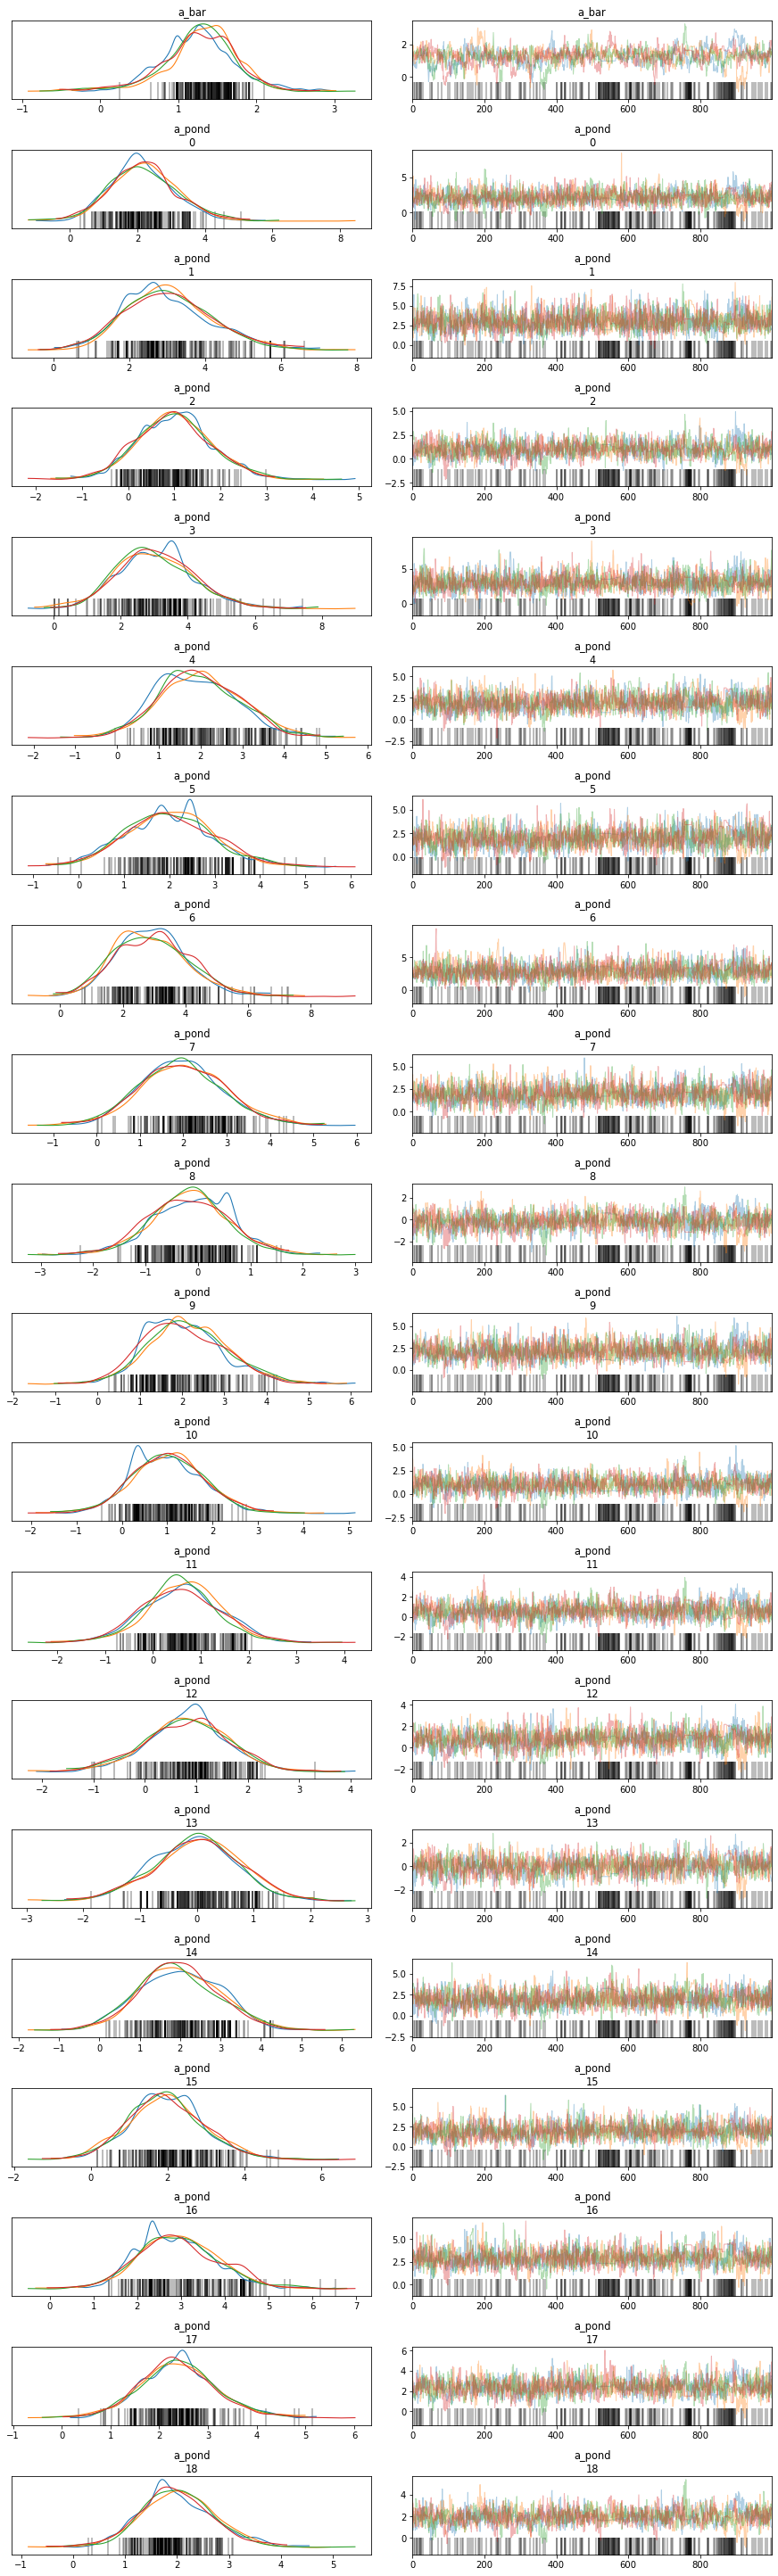

In [62]:
az.plot_trace(m3_trace)

---
---

In [64]:
%load_ext watermark
%watermark -iv -v -nuw

Last updated: Sat Apr 03 2021

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

seaborn   : 0.11.0
arviz     : 0.10.0
numpy     : 1.19.1
matplotlib: 3.3.2
pandas    : 1.0.5
scipy     : 1.5.4
daft      : 0.1.0
pymc3     : 3.9.3

Watermark: 2.1.0

